Matheus do Ó Santos Tiburcio

# Prática 3 - PCA

##Base de dados escolhida:

O trabalho consistia em aplicar PCA à uma base de dados de nossa escolha. Escolhi uma base de dados da COVID-19 do qual adquiri nesse link: https://www.kaggle.com/datasets/imdevskp/corona-virus-report. Em especial o "day_wise.csv".

A base mostra, diariamente, alguns dados como o número de mortes, de novos casos e de pessoas que se recuperaram.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap, set as nset
import sympy as sym

In [ ]:
nset(rc = {'figure.figsize':(8, 8)})

#constroi um mapa de calor
def MapaDeCalor(M, c):
  heatmap(M, xticklabels = c, yticklabels = c)

#ordena autovalores e autovetores em ordem descrescente
def OrdenaAutoCoisas(autovalores, autovetores):
  indexCrescente = autovalores.argsort()[::-1]

  autovalores = autovalores[indexCrescente]
  autovetores = autovetores[:, indexCrescente]

  return autovalores, autovetores

#retorna a soma total de todos os autovalores
def SomaAutovalores(autovalores):
  soma = 0
  for i in autovalores:
    soma += i
  return soma

#determina o percentual de um autovalor em uma soma de autovalores
def PercentualAutovalor(soma, autovalor):
  return autovalor/soma

#determina o percentual de cada autovalor
def PercentualAutovaloresTotal(percentual, k):
  percentualTotal = 0
  for i in range(0, k):
    percentualTotal += percentual[i]
  return percentualTotal

#gera um plot 2D entre 2 PCAs
def GeraPlotPCA(ax, PCA1, PCA2, indexes):
  ax.scatter(PCA1, PCA2)
  ax.set_xlabel(f'PC{indexes[0]}')
  ax.set_ylabel(f'PC{indexes[1]}')

  return ax

#faz o PCA
def AchaPC(Cov, X, lim = 0.9):
  #encontra autovalres e autovetores da matrix de covariancia e ordena em
  #orden decrescente
  autovalores, autovetores = np.linalg.eig(Cov)
  autovalores, autovetores = OrdenaAutoCoisas(autovalores, autovetores)


  #calcuma a soma dos autovalores
  somaAutovalores = SomaAutovalores(autovalores)

  percentualAutovalores = []

  #define o percentual em relacao a soma de cada autovalor
  for i in autovalores:
    percentualAutovalores.append(PercentualAutovalor(somaAutovalores, i))


  k = 0

  #teste diferentes números de PCA até a porcentagem ser maior ou igual ao
  #limite passado para a função
  for i in range(0, len(autovalores)):
    if(PercentualAutovaloresTotal(percentualAutovalores, i) >= lim):
      k = i
      break

  #ordena os primeiros k vetores dos maiores k autovalores
  topKAutovetores = autovetores[:, 0:k]

  #devolve os vetores PCA
  return X.dot(topKAutovetores)

In [ ]:
caminho = "day_wise.csv"

df = pd.read_csv(caminho)

In [ ]:
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [ ]:
colunas = df.columns
scaler = StandardScaler()

#teste 1
X = np.matrix(df.iloc[:, 1:])
Xs = scaler.fit_transform(np.asarray(X))

Cov = np.cov(Xs.T)

In [ ]:
X.shape

(188, 11)

Primeiro de tudo, imprimo o mapa de calor da matriz de covariância, ela mostra a relação entre nossas variáveis. Quanto mais próximo o valor estiver de 1, mais relacionadas as variáveis estão.

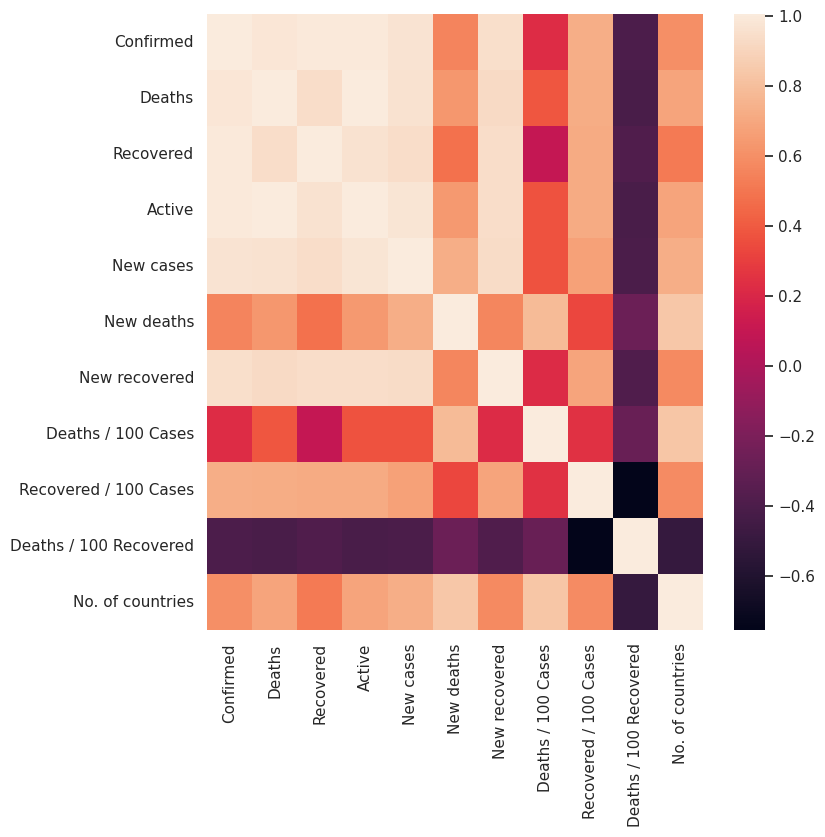

In [ ]:
MapaDeCalor(Cov, colunas[1:])

#PCA

Temos que no SVD, uma matriz X pode ser representada por:

obs: denotei ' por "transposto".

##X = UΣV, onde:

###U contém os autovetores da matriz de covariância de X: X'X

###Σ contém os valores singulares de X

###V contém os autovetores da matrix XX'

O PCA aplica uma redução nos números de autovetores utilizados. A grosso modo, gera uma projeção dos dados sob os autovetores selecionados (geralmente os de maior autovalor associado).

A matrix com os PCs, denotada aqui por Y, é dada por:

###Y' = X'U, onde as colunas de Y' são os PCs

em meu código X' na verdade é X e vice-versa, então vou trocar a notação para:

Y' = XU

In [ ]:
lim = 0.90

PCs = AchaPC(Cov, Xs, lim)
print(f"{PCs.shape[1]} PCs são o suficiente para uma eficácia >= {0.9*100}%")

3 PCs são o suficiente para uma eficácia >= 90.0%


#Eficácia

Aqui defino eficácia como quantos porcentos os n maiores autovalores da matriz de covariância possuem em comparação a soma de todos os autovalores de X'X. No exemplo acima exigi 90% de eficácia e somente 3 autovalores já satisfizeram isso, em outras palavras, 3 autovalores já contribuem para 90 ou mais % da soma de todos os autovalores e serão, portanto, os que mais serão utilizados na hora de projetar os dados através do PCA.

Nesse caso o PCA utilizará os 3 autovetores que estão associados a esses 3 maiores autovalores.

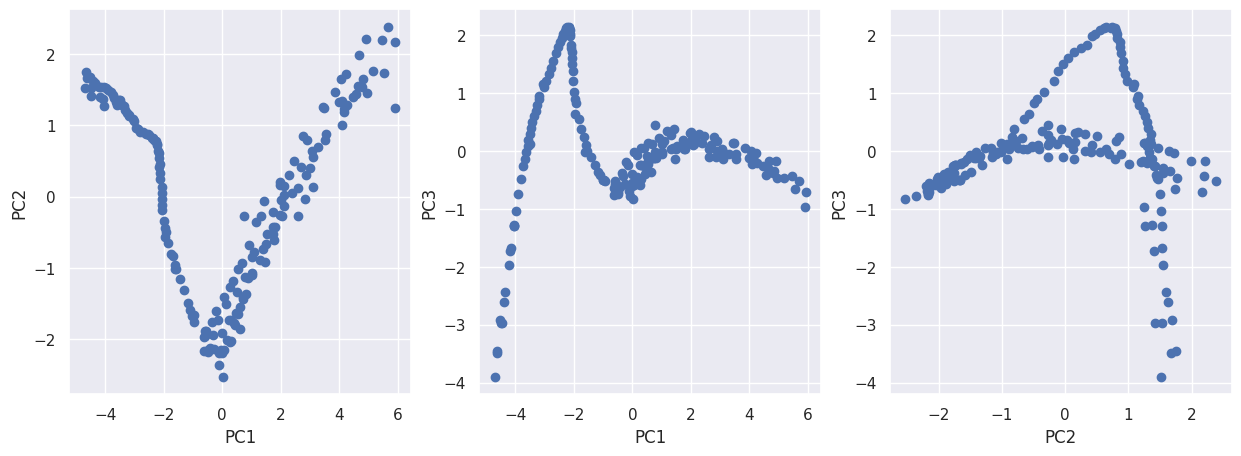

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0] = GeraPlotPCA(ax[0], PCs[:, 0], PCs[:, 1], (1, 2))
ax[1] = GeraPlotPCA(ax[1], PCs[:, 0], PCs[:, 2], (1, 3))
ax[2] = GeraPlotPCA(ax[2], PCs[:, 1], PCs[:, 2], (2, 3))
plt.show()

In [ ]:
df["PC1"] = PCs[:, 0]
df["PC2"] = PCs[:, 1]
df["PC3"] = PCs[:, 2]

In [ ]:
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,PC1,PC2,PC3
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,-4.037191,1.268421,-1.292801
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,-4.062949,1.378112,-1.275306
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,-4.174062,1.399983,-1.717604
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,-4.469381,1.420389,-2.968683
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,-4.495282,1.526129,-2.969556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,5.909267,1.250953,-0.967283
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,5.931413,2.168980,-0.709498
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,5.688219,2.386153,-0.510027
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,4.921096,2.217270,-0.166743


#Análise do que cada PC está dizendo

Sendo bem sincero, não consegui uma interpretação satisfatória do que cada PCA teoricamente estaria me dizendo. Parece que valores maiores para PC1 e PC2 remetiam a datas mais avançadas, onde casos de confirmados, de morte e recuperados é bem maior que os iniciais. Já o PC3 não parece seguir isso a risca e as datas onde ele é maior não necessáriamente são tão na frente como acontece com o PC1 e PC2.

In [ ]:
df.sort_values(by="PC1", ascending=False)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,PC1,PC2,PC3
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,5.931413,2.168980,-0.709498
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,5.909267,1.250953,-0.967283
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,5.688219,2.386153,-0.510027
182,2020-07-22,15227725,623540,8541255,6062930,280647,6983,176269,4.09,56.09,7.30,187,5.554607,1.734668,-0.661132
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187,5.464220,2.199999,-0.433292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,-4.495282,1.526129,-2.969556
7,2020-01-29,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18,-4.521707,1.687473,-2.923820
6,2020-01-28,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16,-4.635365,1.665713,-3.490133
8,2020-01-30,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20,-4.643814,1.747835,-3.446248


In [ ]:
df.sort_values(by="PC2", ascending=False)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,PC1,PC2,PC3
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,5.688219,2.386153,-0.510027
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,4.921096,2.217270,-0.166743
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187,5.464220,2.199999,-0.433292
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,5.931413,2.168980,-0.709498
180,2020-07-20,14713623,610319,8190777,5912527,206778,4160,158542,4.15,55.67,7.45,187,4.682559,1.990147,-0.175708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-04-09,1584249,101279,346349,1136621,86625,7629,24332,6.39,21.86,29.24,183,-0.480269,-2.173595,-0.736068
85,2020-04-16,2162715,148591,529015,1485109,96712,7283,30090,6.87,24.46,28.09,184,-0.120301,-2.191664,-0.686007
90,2020-04-21,2553508,181122,664043,1708343,75250,7157,34181,7.09,26.01,27.28,184,-0.014066,-2.197223,-0.610050
84,2020-04-15,2066003,141308,498925,1425770,80829,8312,35911,6.84,24.15,28.32,184,-0.097690,-2.361785,-0.774314


In [ ]:
df.sort_values(by="PC3", ascending=False)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,PC1,PC2,PC3
45,2020-03-07,105312,3553,56760,44999,4038,99,2490,3.37,53.90,6.26,94,-2.226206,0.744765,2.147226
46,2020-03-08,109266,3797,59092,46377,3954,244,2332,3.48,54.08,6.43,99,-2.175936,0.643816,2.135351
44,2020-03-06,101274,3454,54270,43550,3943,112,2033,3.41,53.59,6.36,93,-2.235410,0.728392,2.132523
47,2020-03-09,113166,3981,60891,48294,3900,184,1799,3.52,53.81,6.54,102,-2.172543,0.615044,2.131931
43,2020-03-05,97331,3342,52237,41752,2791,93,2618,3.43,53.67,6.40,84,-2.276693,0.783222,2.128168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,-4.469381,1.420389,-2.968683
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,-4.495282,1.526129,-2.969556
8,2020-01-30,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20,-4.643814,1.747835,-3.446248
6,2020-01-28,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16,-4.635365,1.665713,-3.490133
